# WeRateDogs Twitter archive project

Jessica Sarah Stow 

Udacity-ALX Data Analytics Student 2022

stowjess@gmail.com

## Project Aims
The goal of this project is to wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. We will be using three sources of data and combining them into one dataset.

### Install packages

In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy # was not used as I struggled getting access to twitter API
import json
import matplotlib.pyplot as plt
%matplotlib inline

## Gather data

### Import `twitter-archive-enhanced.csv` into pandas dataframe

Twitter archive was taken from [here](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv).

In [2]:
df_archive = pd.read_csv('twitter-archive-enhanced.csv') # Read in csv file into pandas dataframe
df_archive # Check csv file was read in correctly

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


### Import `image-predications.tsv` into pandas dataframe

Image predictions were taken from [here](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv).

In [3]:
# Use requests library to download tsv file from a website
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

# Save tsv to file
with open('image-predictions.tsv', mode='wb') as file:
    file.write(response.content)

In [4]:
df_pred = pd.read_csv('image-predictions.tsv', sep='\t') # Read in tsv file as a Pandas DataFrame
df_pred # Check tsv file was read in correctly

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


### Use Twitter API to import tweets into dataframe

I had trouble accessing the Twitter API, so have downloaded the available `tweet-json.txt` file.

### Import `tweet-json.txt` file

In [5]:
# For loop to append each tweet into a list
tweets_data = [] # Create empty list

In [6]:
tweet_file = open('tweet-json.txt', "r")

for line in tweet_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
        
tweet_file.close()

In [7]:
# Create df_api DataFrame
df_api = pd.DataFrame()

In [8]:
# Add 'id', 'retweet_count' and 'favorite_count' variables to df_api DataFrame
df_api['id'] = list(map(lambda tweet: tweet['id'], tweets_data))
df_api['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweets_data))
df_api['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweets_data))

## Assess data

Visually and programmatically assess the data for at least 2 tidiness and 8 quality issues.

### View `df_archive` dataframe.

In [9]:
df_archive.info() # View information about df_archive dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [10]:
print(len(df_archive[df_archive['expanded_urls'].isna()]))

59


In [11]:
print(len(df_archive[df_archive['retweeted_status_id'].notna()]))

181


In [12]:
df_archive.head(10) # View first 10 rows of df_archive dataframe

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [13]:
df_archive.tail(10) # View last 10 rows of df_archive dataframe

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2346,666058600524156928,NaN,NaN,2015-11-16 01:01:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is the Rand Paul of retrievers folks! He'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666058600...,8,10,the,None,None,None,None
2347,666057090499244032,NaN,NaN,2015-11-16 00:55:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",My oh my. This is a rare blond Canadian terrie...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666057090...,9,10,a,None,None,None,None
2348,666055525042405380,NaN,NaN,2015-11-16 00:49:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a Siberian heavily armored polar bear ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666055525...,10,10,a,None,None,None,None
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [14]:
df_archive.describe() # View descriptive statistics of df_archive dataframe

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [15]:
df_archive.shape # View shape of df_archive dataframe

(2356, 17)

### View `df_pred` dataframe.

In [16]:
df_pred.info() # View information about the df_pred dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
df_pred.head(10) # View first 10 rows of df_pred dataframe

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [18]:
df_pred.tail(10) # View last 10 rows of df_pred dataframe

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2065,890240255349198849,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
2066,890609185150312448,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
2067,890729181411237888,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
2068,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [19]:
df_pred.describe() # View descriptive statistics of df_pred dataframe

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [20]:
df_pred.shape # View shape of df_pred dataframe

(2075, 12)

### View `df_api` dataframe.

In [21]:
df_api.info() # View information about the df_api dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [22]:
df_api.head() # View the first 5 rows of df_api dataframe

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [23]:
df_api.tail() # View the last 5 rows of the df_api dataframe

,id,retweet_count,favorite_count
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132
2353,666020888022790149,532,2535


In [24]:
df_api.describe() # View descriptive statistics for the df_api dataframe

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [25]:
df_api.shape # View shape of df_api dataframe

(2354, 3)

#### Tidiness problems:

- three tables (`df_archive`, `df_pred` and `df_api`), instead of one (all share common variable 'tweet_id' ('id' for `df_api` table)).

`df_archive`
- dog stage variable in four separate columns: 'doggo', 'floofer', 'pupper', 'puppo', instead of a single categorical variable.

`df_api`
- non-descriptive column header (column 'id' / 'tweet_id')

#### Quality problems:

`df_archive`
- dataframe contains retweets (181 rows with values for 'retweeted_status_id')
- 'name' column has values 'None' and contains names that are words, e.g. "a", "the" and "an".
- 'rating_numerator' has a very large maximum value of 1776 
- 'rating_denominator' has values that are not equal to 10 (all We Rate Dogs ratings are a score out of 10)
- erroneous datatypes ('tweet_id', 'timestamp', 'retweeted_status_timestamp')

`df_pred`
- tweets without images (2075 tweets with image predictions, 281 without)
- erroneous datatypes ('tweet_id')

`df_api`
- erroneous datatypes ('id')

## Clean Data

Make copies of each dataset before beginning cleaning process.

In [26]:
df_archive_clean = df_archive.copy()
df_pred_clean = df_pred.copy()
df_api_clean = df_api.copy()

The tidiness issues will be addressed before the quality issues.

#### Define
Change 'id' column in `df_api_clean` to 'tweet_id' (the same variable name as in `df_pred_clean` and `df_archive_clean`) using pandas' 'rename'.

#### Code

In [27]:
df_api_clean = df_api_clean.rename(columns={'id': 'tweet_id',}) 

#### Test

In [28]:
df_api_clean.info() # column name was successfully changed to 'tweet_id'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


#### Define
Combine three dataframes (`df_archive_clean`, `df_pred_clean` and `df_api_clean`) into one dataframe `df` using pandas' 'merge'. Drop tweets that do not belong to all 3 datasets.

#### Code

In [29]:
df = pd.merge(df_archive_clean, df_pred_clean, on=['tweet_id'])

In [30]:
df = pd.merge(df, df_api_clean, on=['tweet_id'])

#### Test

In [31]:
df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,...,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,41,111
2069,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,...,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,147,311
2070,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,...,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,47,128
2071,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,...,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,48,132


In [32]:
df.shape

(2073, 30)

#### Define
Condense the four columns of dog stages into one column 'dog_stage' (categorical)

#### Code

In [33]:
df['dog_stage'] = df['text'].str.extract('(puppo|pupper|floofer|doggo)', expand=True)
# Create 'dog_stage' variable by extracting the dog stage variables from the text column when available
df['dog_stage'] = df['dog_stage'].astype('category') # categorical datatype

delete = ['doggo', 'floofer', 'pupper', 'puppo'] # Variable 'delete' contains columns that are no longer needed 
df = df.drop(delete, axis=1) # drop variables from df dataframe

#### Test

In [34]:
df
# 'dog_stage' column was successfully added 
# 'puppo', 'pupper', 'floofer' and 'doggo' columns were removed

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,False,bagel,0.085851,False,banana,0.076110,False,8853,39467,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,...,True,Rottweiler,0.243682,True,Doberman,0.154629,True,41,111,NaN
2069,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,...,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,147,311,NaN
2070,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,...,True,malinois,0.138584,True,bloodhound,0.116197,True,47,128,NaN
2071,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,...,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,48,132,NaN


In [35]:
df.shape

(2073, 27)

#### Define

Using pandas 'astype':
- change 'tweet_id' to str 
- change 'timestamp' and 'retweeted_status_timestamp' to datetime64

#### Code

In [36]:
# to object
df['tweet_id'] = df['tweet_id'].astype(str)

# to datetime
df['timestamp'] = df['timestamp'].astype('datetime64[ns]')
df['retweeted_status_timestamp'] = df['retweeted_status_timestamp'].astype('datetime64[ns]')

#### Test

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2073 non-null   object        
 1   in_reply_to_status_id       23 non-null     float64       
 2   in_reply_to_user_id         23 non-null     float64       
 3   timestamp                   2073 non-null   datetime64[ns]
 4   source                      2073 non-null   object        
 5   text                        2073 non-null   object        
 6   retweeted_status_id         79 non-null     float64       
 7   retweeted_status_user_id    79 non-null     float64       
 8   retweeted_status_timestamp  79 non-null     datetime64[ns]
 9   expanded_urls               2073 non-null   object        
 10  rating_numerator            2073 non-null   int64         
 11  rating_denominator          2073 non-null   int64       

#### Define
Remove retweets from dataset

#### Code

In [38]:
df = df[df['retweeted_status_id'].isna()] 
# remove rows that do not contain NaN values for retweeted_status_id, i.e. remove retweets

#### Test

In [39]:
df.shape 

(1994, 27)

In [40]:
df.retweeted_status_id.unique() # only NaN values remain in the df_archive_clean dataframe

array([nan])

#### Define
Remove words from 'names' column, i.e. allow for only capitalised names, and remove 'None' values

#### Code

In [41]:
df = df[df['name'].str[0].str.isupper()] # Only uppercase names (no words)

In [42]:
df = df.replace(to_replace='None', value=np.nan) # Replace 'None' with pandas' NaN'
df = df[df['name'].notna()] # Remove rows with values 'NaN'

#### Test

In [43]:
df.name.sort_values(ascending=True) 

847      Abby
836      Abby
768       Ace
1656     Acro
1109    Adele
        ...  
96       Zoey
1862     Zoey
8        Zoey
125     Zooey
1602     Zuzu
Name: name, Length: 1350, dtype: object

#### Define
Remove numerator ratings that are extremely high (outliers)

#### Code

In [44]:
df.rating_numerator.unique()# Which numerator ratings are included?

array([  13,   12,   14,    5,   11,    6,   10,   24,   75,   27,    3,
          8,    9,    4,    7, 1776,   50,    2])

In [45]:
# remove tweet with rating_numerator >=50
df = df[df.rating_numerator != 1776] 
df = df[df.rating_numerator != 75] 
df = df[df.rating_numerator != 50] 

#### Test

In [46]:
df.rating_numerator.sort_values(ascending=False).unique() # 1776, 75 and 50 not included

array([27, 24, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2])

#### Define
Remove denominator ratings that are not equal to 10

#### Code

In [47]:
df.rating_denominator.unique() # Which denominator ratings are included?

array([10,  7, 11])

In [48]:
df.shape

(1347, 27)

In [49]:
# Remove tweets
df = df[df.rating_denominator != 7] # remove rating_denominator of 7
df = df[df.rating_denominator != 11] # remove rating_denominator of 11

#### Test

In [50]:
df.shape # 2 rows were removed

(1345, 27)

In [51]:
df[df.rating_denominator == 7] # denominator of 7 no longer included in df dataframe

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,dog_stage


In [52]:
df[df.rating_denominator == 11] # denominator of 11 no longer included in df dataframe

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,dog_stage


In [53]:
df.rating_denominator.unique() # only 10s used as denominator

array([10])

### Question for reviewer: 

I wanted to change 'in_reply_to_status_id', 'retweeted_status_user_id', 'retweeted_status_id' and 'retweeted_status_user_id' from data type 'float' to data type 'object', but this converted NaN values to string values 'nan' so they were no longer read as null entries. 
#### How do I correct for this? (How can I read 'NaN's as null values when changing to datatype 'str'?)
#### See the code I used below:
   
    # Change to 'str' datatype: 
    df['in_reply_to_status_id'] = df['in_reply_to_status_id'].astype(str)
    df['in_reply_to_user_id'] = df['in_reply_to_user_id'].astype(str)
    df['retweeted_status_id'] = df['retweeted_status_id'].astype(str)
    df['retweeted_status_user_id'] = df['retweeted_status_user_id'].astype(str)
    
    # View info
    df.info() # This showed that all 4 variables that I changed above do not contain any null/NaN values. 

## Store Data

In [54]:
df.to_csv('twitter_archive_master.csv', index = False)

## Analyse and Visualise Data 

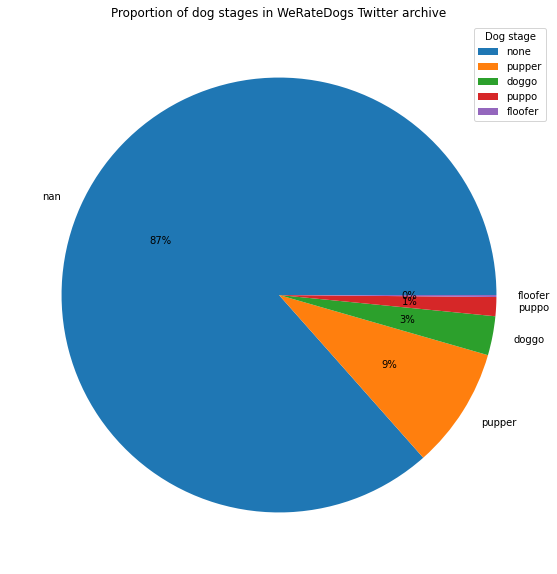

In [55]:
df['dog_stage'].value_counts(dropna=False).plot.pie(ylabel ='', figsize= (10,10), 
                                           title="Proportion of dog stages in WeRateDogs Twitter archive", autopct='%1.0f%%');
plt.legend(title= "Dog stage", labels =["none", "pupper", "doggo", "puppo", "floofer"])

- most of dogs were not classified into a specific dog stage

In [56]:
# user-defined function for creating barcharts 
def barchart(x, title, xlabel, ylabel):
    x.plot(kind = 'bar')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    return plt.show()

In [57]:
top_breeds = df.loc[(df['p1_dog'] == True)].p1.value_counts().nlargest(10).sort_values(ascending = False)

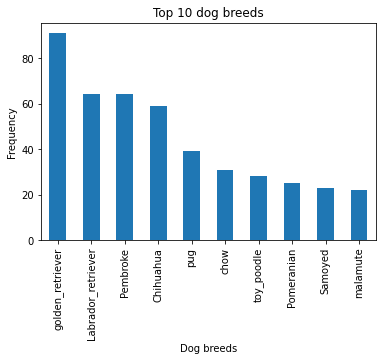

In [58]:
barchart(top_breeds, 'Top 10 dog breeds', 'Dog breeds', "Frequency")

In [59]:
print(top_breeds.sort_values(ascending = False))

golden_retriever      91
Labrador_retriever    64
Pembroke              64
Chihuahua             59
pug                   39
chow                  31
toy_poodle            28
Pomeranian            25
Samoyed               23
malamute              22
Name: p1, dtype: int64


- the most common dog breed identified by the algorithm was a golden retriever

In [60]:
top_names = df.name.value_counts().nlargest(10).sort_values(ascending = False)

In [61]:
top_names

Charlie    11
Oliver     10
Cooper     10
Lucy       10
Penny       9
Tucker      9
Sadie       8
Winston     8
Daisy       7
Toby        7
Name: name, dtype: int64

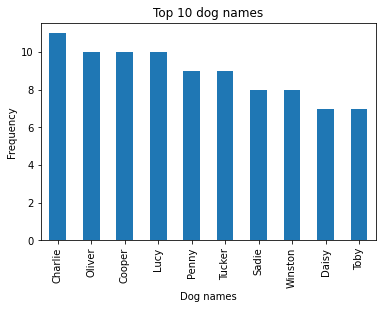

In [62]:
barchart(top_names, 'Top 10 dog names', 'Dog names', "Frequency")

In [63]:
print(top_names.sort_values(ascending = False))

Charlie    11
Oliver     10
Cooper     10
Lucy       10
Penny       9
Tucker      9
Sadie       8
Winston     8
Daisy       7
Toby        7
Name: name, dtype: int64


- the most popular name is Charlie, followed by Oliver, Cooper and Lucy. 

In [64]:
dog_rate = df.rating_numerator.sort_values().value_counts(sort=False)

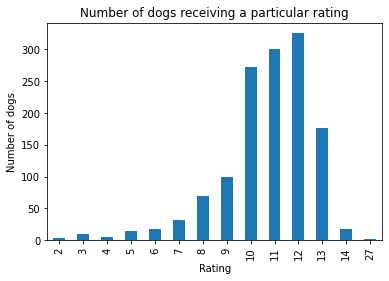

In [65]:
barchart(dog_rate, 'Number of dogs receiving a particular rating', 'Rating', 'Number of dogs')

In [66]:
print(dog_rate.sort_values(ascending = False))

12    326
11    301
10    273
13    176
9     100
8      70
7      32
6      17
14     17
5      14
3      10
4       5
2       3
27      1
Name: rating_numerator, dtype: int64


- the most popular rating for dogs was 12/10 (326 dogs received this rating). 

In [67]:
df.loc[(df['favorite_count'] == df.favorite_count.max())] # tweet id 879415818425184262

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,dog_stage
59,879415818425184262,NaN,NaN,2017-06-26 19:07:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Duddles. He did an attempt. 13/10 some...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/879415818...,...,True,Boston_bull,0.134967,True,Cardigan,0.110481,True,45849,107956,NaN


- the most popular tweet by favourite count was tweet_id #879415818425184262  (107 956 favorites) 

In [68]:
df.loc[(df['retweet_count'] == df.retweet_count.max())] # tweet id 807106840509214720

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,dog_stage
432,807106840509214720,NaN,NaN,2016-12-09 06:17:20,"<a href=""http://twitter.com/download/iphone"" r...",This is Stephan. He just wants to help. 13/10 ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/807106840...,...,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True,56625,107015,NaN


- the most popular tweet by retweet count was tweet_id #807106840509214720 (56 625 retweets)

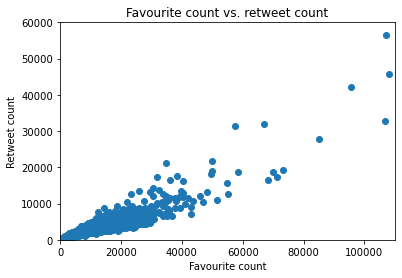

In [69]:
plt.scatter(df.favorite_count, df.retweet_count);
plt.xlim(0, 110000);
plt.ylim(0, 60000);

plt.xlabel('Favourite count');
plt.ylabel('Retweet count');
plt.title('Favourite count vs. retweet count');

- There is a positive relationship between retweet counts and favourite counts

In [70]:
rate = df.rating_numerator.sort_values().unique() # store all unique ratings of numerators 

In [71]:
# new dataframe, groupby 'rating numerator' to get the TOTAL retweet count and favorite count for each rating
df2 = df[['rating_numerator', 'retweet_count', 'favorite_count']].groupby(['rating_numerator']).sum()
df2

,retweet_count,favorite_count
rating_numerator,,
2,3943,8091
3,10116,28508
4,5549,17264
5,26919,85944
6,22142,64035
7,41818,119450
8,63314,175624
9,82142,246010
10,384342,1098895


In [72]:
df2.loc[(df2['retweet_count'] == df2.retweet_count.max())]

,retweet_count,favorite_count
rating_numerator,,
13,1129025,4147381


In [73]:
df2.loc[(df2['favorite_count'] == df2.favorite_count.max())] 

,retweet_count,favorite_count
rating_numerator,,
13,1129025,4147381


- dogs with rating numerators of 13 had the highest total favorite count (4147381 favorites), and highest total retweet (1129025) count. 

In [74]:
avg_retweet = df2['retweet_count'] / df.rating_numerator.value_counts()
avg_retweet = avg_retweet.sort_values(ascending = False)
avg_retweet

14    10702.058824
13     6414.914773
12     3271.202454
11     2222.538206
5      1922.785714
27     1885.000000
10     1407.846154
2      1314.333333
7      1306.812500
6      1302.470588
4      1109.800000
3      1011.600000
8       904.485714
9       821.420000
dtype: float64

In [75]:
avg_retweet.max()

10702.058823529413

- dogs with a rating of 14/10 had the highest average retweet count (average of 10 702 retweets per tweet)

In [76]:
avg_favorite = df2['favorite_count'] / df.rating_numerator.value_counts()
avg_favorite = avg_favorite.sort_values(ascending = False)
avg_favorite

14    32852.117647
13    23564.664773
12    12237.782209
27     7320.000000
11     6957.368771
5      6138.857143
10     4025.256410
6      3766.764706
7      3732.812500
4      3452.800000
3      2850.800000
2      2697.000000
8      2508.914286
9      2460.100000
dtype: float64

In [77]:
avg_favorite.max()

32852.117647058825

- dogs with a rating of 14/10 had the highest average favorite count (average of 32 852 favorites per tweet)

In [78]:
df['timestamp'] = df['timestamp'].dt.date # first we change format so we are looking across dates
df3 = df[['timestamp', 'retweet_count', 'favorite_count']].groupby(['timestamp']).sum() # new dataframe - looking at total favorite/retweet count for certain dates 
df3

,retweet_count,favorite_count
timestamp,,
2015-11-17,504,1459
2015-11-18,1345,3234
2015-11-19,27391,70783
2015-11-20,3214,6141
2015-11-21,4202,9896
...,...,...
2017-07-28,2158,12041
2017-07-29,9774,41048
2017-07-30,8964,42908


In [79]:
df3.loc[(df3['retweet_count'] == df3.retweet_count.max())]

,retweet_count,favorite_count
timestamp,,
2017-01-11,71755,171062


In [80]:
df3.loc[(df3['favorite_count'] == df3.favorite_count.max())]

,retweet_count,favorite_count
timestamp,,
2017-01-11,71755,171062


- 11 January 2017 had the highest number of retweets (71755) and favorite counts (171062) in a single day

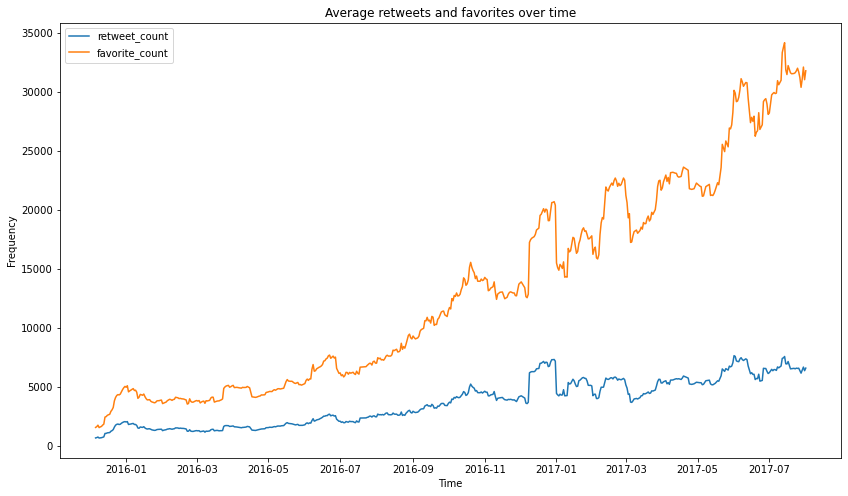

In [81]:
df4 = df[['timestamp', 'retweet_count', 'favorite_count']].groupby(['timestamp']).mean() # new dataframe - looking at average favorite/retweet count for certain dates 
df4

df4['retweet_count'] = df4['retweet_count'].rolling(window=20).mean() # Use moving averages to smooth the line
df4['favorite_count'] = df4['favorite_count'].rolling(window=20).mean() # Use moving averages to smooth the line

# Plot
df4.plot(figsize=(14, 8), title='Average retweets and favorites over time');
plt.ylabel('Frequency');
plt.xlabel('Time');
plt.show()

- overtime the average favorite count for each WeRateDogs tweet steadily increased
- there was a slight increase in the average retweet for each WeRateDogs tweet over time

## Report

See `wrangle.report.pdf` and `act_report.pdf`